# Plotting Functions

## Part 1: Plotting Warm Up

Here we will do some practice with plotting of functions. Below are the details of the lines desired to be plotted.


| Name       | Value                       | Color | Line Width     | Style  |
|------------|-----------------------------|-------|----------------|--------|
| sinusoid   | 3 * sin (2/3 x)             | Red   | 4              | dotted |
| polynomial | (x-3) (x - 2) (x-8) / 10    | Blue  | 2              | solid  |
| abs value  | min(abs(x - 3), abs(x - 8)) | Green | 3              | dashed |



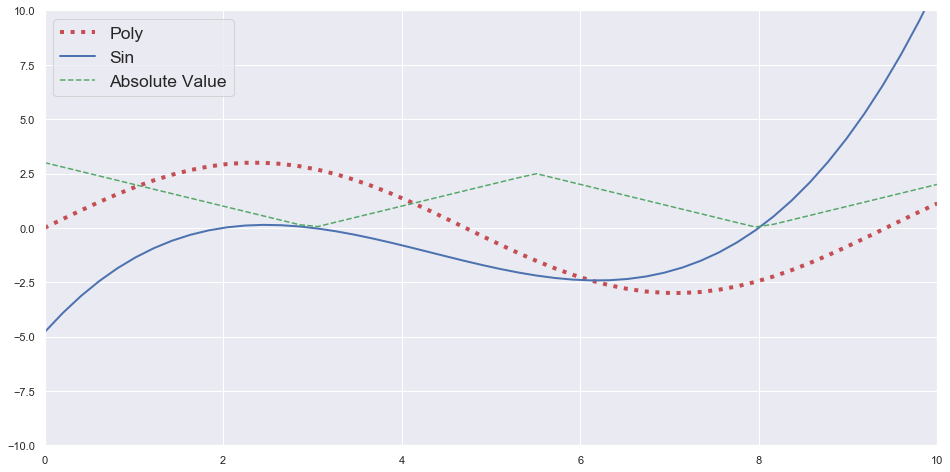

2.0408163265306123

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
# help from here for graphing: https://www.youtube.com/watch?v=u5VCZBUNOcA 
# help from here for error with function not accepting array: https://stackoverflow.com/questions/36680402/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-plot-sh#:~:text=4%20Answers&text=The%20error%20%22only%20length%2D1,you%20pass%20an%20array%20instead.&text=You%20can%20skip%20the%20definition,vectorize(np.int)%20.

sns.set()
# define x (evenly spaced x-vals 0,10)
x = np.linspace(0,10, 50)

# define polynomial function to be plotted
def poly(x): return (x-3)*(x-2)*(x-8)/10
# define sinuoid function to be plotted

def sinus(x): return 3 * math.sin((2/3) * x)
# vectorizing to avoid error of function only accepting 1 value, not list
sinus_vector = np.vectorize(sinus)

# define absolute value function to be plotted 
def abs_val(x): return min(abs(x - 3), abs(x - 8))
# vectorizing function to avoid error of function only accepting 1 value, not list
absolute_vector = np.vectorize(abs_val)

#setting figure size
plt.figure(figsize=(16,8))

# plotting function with line specs
plt.plot(x, sinus_vector(x), label="Sin", c='r', linestyle=':', linewidth=4)
plt.plot(x, poly(x), label='poly', c='b', linestyle='-', linewidth=2)
plt.plot(x, absolute_vector(x), label="Absolute Value", c='g', linestyle='--')

#add legend and axis control
plt.legend(["Poly", "Sin", 'Absolute Value'], prop={'size':17.5})
plt.axis([0,10,-10, 10])
plt.show()

# Bike Data

## Part 2: DataFrame Analysis Warm Up (7 points)
Some practice with creating DataFrames

| Bike ID | Rider ID | Make      | Color      | Bike Type  | Weight (g) | Time Trial 1 (s) | Time Trial 2 (s) |
|---------|----------|-----------|------------|------------|------------|------------------|------------------|
| 037     | 3        | Bianchi   | Celeste    | Road       | 8200       | 450              | 205              |
| 379     | 1        | Duratec   | \<no paint>| Cyclocross | 9500       | 510              | 222              |
| 398     | 7        | Trek      | Red        | Road       | 9000       | 432              | 211              |
| 37B     | 3        | Trek      | Black      | Mountain   | 13607      | 561              | 301              |
| BRG     | 7        | Canondale | Black      | Mountain   | 15005      | 524              | 299              |
       


In [1]:
import pandas as pd
# create dictionry
bike_dict = {"Bike ID": ("037", "379", "398", "37B", "BRG"),
            "Rider ID": (3, 1, 7, 3, 7),
            "Make": ("Bianchi", "Duratec", "Trek", "Trek", "Canondale"),
            "Color": ("Celeste", "", "Red", "Black", "Black"),
            "Bike Type": ("Road", "Cyclocross", "Road", "Mountain", "Mountain"),
            "Weight(g)": (8200, 9500, 9000, 13607, 15005),
            "Time Trial 1(s)": (450, 510, 432, 561, 524),
            "Time Trial 2(s)": (205, 222, 211, 301, 299)}
# convert dictionary to DataFrame and set index
df_bikes = pd.DataFrame(bike_dict)
df_bikes.set_index('Bike ID')
#export DF to CSV
df_bikes.to_csv("Bike_Data_Answer.csv", index=False)
df_bikes

,Bike ID,Rider ID,Make,Color,Bike Type,Weight(g),Time Trial 1(s),Time Trial 2(s)
0,037,3,Bianchi,Celeste,Road,8200,450,205
1,379,1,Duratec,,Cyclocross,9500,510,222
2,398,7,Trek,Red,Road,9000,432,211
3,37B,3,Trek,Black,Mountain,13607,561,301
4,BRG,7,Canondale,Black,Mountain,15005,524,299


## Part 3: Manipulating DataFrames

Manipulating the DataFrame to answer some simple Questions.

### Questions:
1. Which `Bike ID`  has the greatest weight?
1. Which `Bike ID` has the fastest average time trial?
1. What is the average weight of each bike, per `Bike Type `?  (Hint: get all bikes types via `.unique()`)

1. Which `Bike ID` has the greatest weight?

In [2]:
# create boolean Series
max_weight = df_bikes['Weight(g)'].max()
weight_boolean = df_bikes['Weight(g)'] == max_weight
# Apply Boolean Series to DataFrame
heaviest_bike = df_bikes[weight_boolean]
heaviest_bike

,Bike ID,Rider ID,Make,Color,Bike Type,Weight(g),Time Trial 1(s),Time Trial 2(s)
4,BRG,7,Canondale,Black,Mountain,15005,524,299


Bike ID `BRG` is the heaviest bike of the 5 bikes at 15005 grams.

2.  Which `Bike ID` has the fastest average time trial?

In [3]:
# Create Time Trial Average Column for assisting in calculation
df_bikes['Time Trial Average'] = (df_bikes['Time Trial 1(s)'] + df_bikes['Time Trial 2(s)']) / 2

# Creating Boolean Series for minimum(fastest) Time Trial
fastest_average = df_bikes['Time Trial Average'].min()
fastest_boolean = df_bikes['Time Trial Average'] == fastest_average

#Apply Boolean Series to DataFrame
fastest_bike = df_bikes[fastest_boolean]
fastest_bike

,Bike ID,Rider ID,Make,Color,Bike Type,Weight(g),Time Trial 1(s),Time Trial 2(s),Time Trial Average
2,398,7,Trek,Red,Road,9000,432,211,321.5


Bike ID `398` is the bike with the fastest time trials, with an average time of 321.5 seconds.

3. What is the average weight of each bike, per `Bike Type `?

In [4]:
# group bikes by Make
grouped_bikes = df_bikes.groupby(['Make']).mean()
# Drop un-needed columns (keeping only Weight and Make)
grouped_bikes.drop(['Rider ID', 'Time Trial 1(s)', 'Time Trial 2(s)',
       'Time Trial Average'], axis=1)

,Weight(g)
Make,
Bianchi,8200.0
Canondale,15005.0
Duratec,9500.0
Trek,11303.5


Above we have the averages of each bike type.

In [5]:
# Create boolean series and apply to Dataframe
max_weight = grouped_bikes['Weight(g)'].max()
weight_bool = grouped_bikes[grouped_bikes['Weight(g)'] == max_weight]
weight_bool

,Rider ID,Weight(g),Time Trial 1(s),Time Trial 2(s),Time Trial Average
Make,,,,,
Canondale,7.0,15005.0,524.0,299.0,411.5


The bike make with the heaviest bike in the data set is Canondale.

# Game Stop Stock
In this exercise we will work with a real-world dataset to look at the activity of the popular (and controversial) GME stock over the last year.

By using a csv file, `gme_data_clean.csv` we can anlyse the recent explosion of the GME Stock. We will use this dataset to practice plotting with matplotlib as well as some DataFrame manipulation. 


## Part 4: Line Plot (15 points)
Create two plots side-by-side plots using `plt.subplot` of the `gme_data_clean.csv` data.  Both are line plots show the daily high and low prices of the GameStop stock vs time, but:
- The leftward plot has a linear y axis
- The rightward plot has a log scale y axis

Using the two side by side plots, we will analyze the use of log scales.

- What do you notice about the difference between plots?  When are log scales useful?

In [10]:
# loading in dataset
df_gme = pd.read_csv("gme_data_clean.csv", index_col='Date')
df_gme = df_gme.sort_index(ascending=True)
df_gme.head()

,Open,High,Low,Close,Volume,days since 2020_Feb_03
Date,,,,,,
2020-02-03,3.88,3.98,3.85,3.95,2026199,0
2020-02-04,4.03,4.25,3.97,4.07,3563061,1
2020-02-05,4.15,4.41,4.14,4.18,2641722,2
2020-02-06,4.20,4.30,4.14,4.14,1510303,3
2020-02-07,4.11,4.13,3.77,3.81,2742281,4


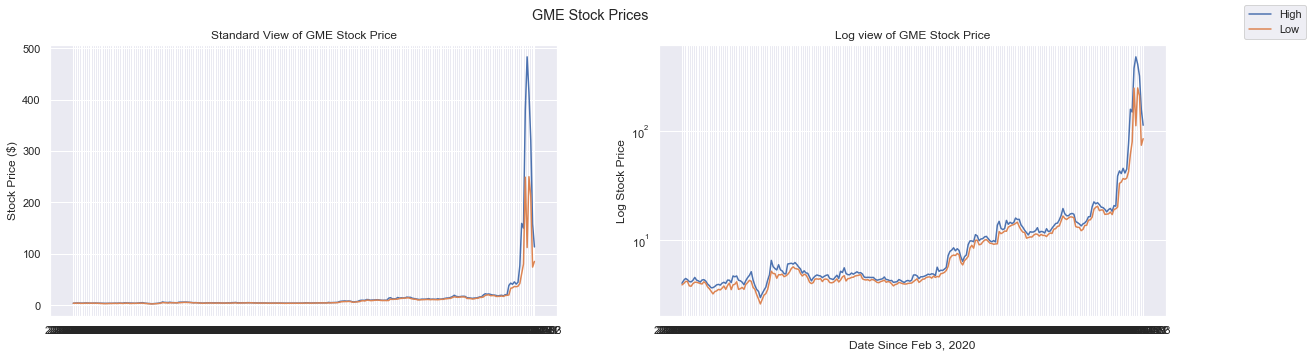

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
fig = plt.figure(figsize = (20, 5))
#create blank subplots
x = fig.add_subplot(1, 2, 1)
x2 = fig.add_subplot(1, 2, 2)
#add data to plot
x.plot(df_gme['High'], label="High")
x.plot(df_gme['Low'], label="Low")
x2.set_yscale('log')
x2.plot(df_gme['High'])
x2.plot(df_gme['Low'])

# set titles
fig.suptitle('GME Stock Prices')
x.set_title("Standard View of GME Stock Price")
x.set_ylabel('Stock Price ($)')

x2.set_ylabel("Log Stock Price")
x2.set_xlabel("Date Since Feb 3, 2020")
x2.set_title("Log view of GME Stock Price")

# add legend and show plot
fig.legend()
plt.show()

#save plot to pdf
fig.savefig('gme_stock_prices.pdf')


Above you can see two views of GME stock price in the last year. On the left we have a normal scale of the stock price and on the right a logrithmic scale of the stock price. The logrithmic view puts all prices to the power of 10, which means viewing big discrepancies in a scale (small min and large max value) the change becomes easier to see. When using a log scale the scale is condnesed and you can see a smoother, potentially more meaningful view of the data.

# IMDB Movie Data

In this exercise we will look at another real dataset, this time it's a sample of the movies represented in IMDb.

Start by loading the `IMDb_movies_clean.csv` file and displaying its `.head()` to see what columns are available and what the data looks like. We will use this dataset to answer key questions about the movie data.

### How long are movies in different genres (Comedy, Horror, Drama)

We are going to create some subplots to show how the duration of movies are different between the 3 genres.


In [12]:
# Load in the Dataset
df_movies = pd.read_csv('IMDb_movies_clean.csv')
df_movies.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,1048,tt0021749,Luci della città,City Lights,1931.0,1931-04-02,"Comedy, Drama, Romance",87,USA,English,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,162668,1500000.0,19181.0,$ 46008,99.0,295.0,122.0
1,2454,tt0027977,Tempi moderni,Modern Times,1936.0,1937-03-12,"Comedy, Drama, Family",87,USA,English,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,211250,1500000.0,163577.0,$ 457688,96.0,307.0,115.0
2,2795,tt0029453,Il bandito della Casbah,Pépé le Moko,1937.0,1937-10-22,"Crime, Drama, Romance",94,France,"French, Arabic",...,"Jean Gabin, Gabriel Gabrio, Saturnin Fabre, Fe...",A wanted gangster is both king and prisoner of...,7.7,6180,60000.0,155895.0,$ 155895,98.0,46.0,55.0
3,2827,tt0029583,Biancaneve e i sette nani,Snow White and the Seven Dwarfs,1937.0,1938-11-30,"Animation, Family, Fantasy",83,USA,English,...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,177157,1499000.0,184925486.0,$ 184925486,95.0,260.0,173.0
4,3266,tt0031381,Via col vento,Gone with the Wind,1939.0,1949-03-12,"Drama, History, Romance",238,USA,English,...,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,283975,3977000.0,200852579.0,$ 402352579,97.0,881.0,197.0


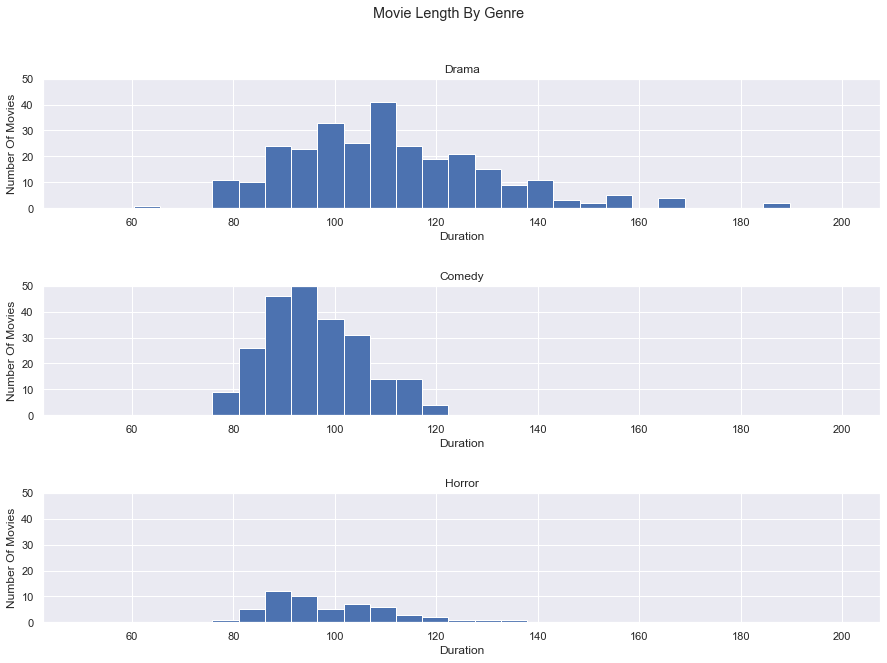

In [15]:
# Creating the list of genres we want to compare
genre_list = ['Drama', 'Comedy', 'Horror']
bins = np.linspace(50,200, 30)
for idx in range(len(genre_list)):
    plt.subplot(len(genre_list), 1, idx + 1)
    
    #build df to be printed
    bool_genre = df_movies['genre'] == genre_list[idx]
    df_movie_genre = df_movies[bool_genre]
    
    # plot histogram
    plt.hist(df_movie_genre['duration'], bins=bins, density=False)
    
    #set individual title
    plt.gca().title.set_text(genre_list[idx])

    plt.ylim(0, 50)
    
    plt.ylabel("Number Of Movies")
    plt.xlabel("Duration")
    
#resizing
plt.gcf().set_size_inches(15, 10)

plt.subplots_adjust(wspace=.3, hspace=.6)
plt.suptitle("Movie Length By Genre");


Based on the graph above, we can determine Drama movies tend to have longer run times. All three graphs closely follow a normal distribution, and the peak for Drama movies is about 110 while Comedy and Horror seem to consolidate around 95 and 100 respectfully. Additoinally Drama has many more movies that run longer. Aside from just a few movies in horror, neither horror or comedy movies have runtimes longer than 120. Meanwhile, Drama has plenty of data points beyond even 130. 

With this information we can assert that Drama movies tend to have longer run times.

### Does budget predict movie ratings? (15 points)
Now, we will use the dataset to see if budget spend on movies can help determine movie ratings. 


Based on the plot, we will answer the following questions (and explain how you read that form the plot):
1. Does it seem that higher budgets result in better reception by the viewers?
1. Which of the two genres appear to get higher scores from the users?
1. Which of the two genres appear to have higher budgets?

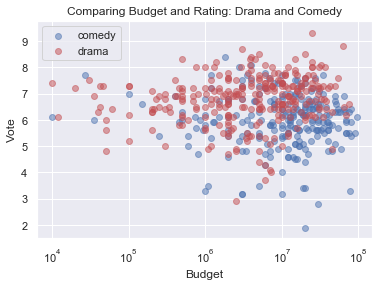

In [16]:
# make DataFrame for Comedy and Drama
df_comedy = df_movies[(df_movies['genre'] == 'Comedy')]
df_drama = df_movies[ (df_movies['genre'] == 'Drama')]

# creating figure and plotting drama v comedy
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(df_comedy['budget'], 
            df_comedy['avg_vote'],
           alpha=.5,
           c='b',
           label='comedy')
ax1.scatter(df_drama['budget'],
           df_drama['avg_vote'],
           alpha=.5,
           c='r',
           label='drama')
# set titles and scale
ax1.set_xscale('log')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Vote')
ax1.set_title("Comparing Budget and Rating: Drama and Comedy")
ax1.legend()

# Comedy vs Drama Analysis

### 1) Does it seem that higher budgets result in better reception by the viewers?

        There does not seem to be a direction relation to higher budget to better ratings. This is clear because most of the data points fall between 6 and 8 all the way across the graph. If there was a relation between the two, you would see ratings get higher as budget got higher, or a positively sloped graph. 
        
### 2) Which of the two genres appear to get higher scores from the users?

        Although it is close, I believe it is safe to say Drama movies get better ratings than comedy movies. This was determined by considering a couple of factors. 
        - First, the majority of the lower ratings, in the 0 - 4 range are blue. 
        - Second, in the movies rated 4 - 7, there seems to be more blue showing thorugh, espically in the 10^7 range. 
        - Third, in the movies rated 7 - 9, the main movies in this section are red, very clearly.
        
      With all this considered, the blue dominating the low end, red dominating the high end, and at worst a split middle, we can say Drama movies acquire a higher viewer score.
      
      
### 3) Which of the two genres appear to have higher budgets?

        This graph makes it clear that comedy movies have higher budgets. This can be determined by scanning the graph from left to right, as the x-axis increases as budget increases. As we scan from left to right, we see the graph is dominated by red data points up until the middle of 10^6 and 10^7. From this point to the right, the graph becomes more dominated by blue data points, or comedies. The closer we are to 10^8, the more comedy movies we see. This means we can assert that comedies have higher budgets than dramas. 

### How has budget, movie voting changed over the years? 
We will try to answer the 2 following questions
- How has the **average** movie budget changed year to year?
- How has the **average** movie score (`avg_vote`) changed year to year?

We want our graph to answer the following questions: 
1. (roughly) How many times more expensive is an average movie made in 2019 compared to an average movie from 1980?
2. Average scores appear to fall over time. One explanation is that nowadays average movies are simply worse than they used to be. Think of at least two other distinct reasons why this may be the case (reasons must be plausible though no justification is needed).


In [17]:
df_movies.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,1048,tt0021749,Luci della città,City Lights,1931.0,1931-04-02,"Comedy, Drama, Romance",87,USA,English,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,162668,1500000.0,19181.0,$ 46008,99.0,295.0,122.0
1,2454,tt0027977,Tempi moderni,Modern Times,1936.0,1937-03-12,"Comedy, Drama, Family",87,USA,English,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,211250,1500000.0,163577.0,$ 457688,96.0,307.0,115.0
2,2795,tt0029453,Il bandito della Casbah,Pépé le Moko,1937.0,1937-10-22,"Crime, Drama, Romance",94,France,"French, Arabic",...,"Jean Gabin, Gabriel Gabrio, Saturnin Fabre, Fe...",A wanted gangster is both king and prisoner of...,7.7,6180,60000.0,155895.0,$ 155895,98.0,46.0,55.0
3,2827,tt0029583,Biancaneve e i sette nani,Snow White and the Seven Dwarfs,1937.0,1938-11-30,"Animation, Family, Fantasy",83,USA,English,...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,177157,1499000.0,184925486.0,$ 184925486,95.0,260.0,173.0
4,3266,tt0031381,Via col vento,Gone with the Wind,1939.0,1949-03-12,"Drama, History, Romance",238,USA,English,...,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,283975,3977000.0,200852579.0,$ 402352579,97.0,881.0,197.0


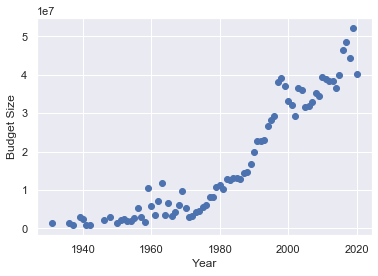

In [18]:
# creating 2 DataFrames , grouped by year and getting the mean of budget and average vote
mean_budget_by_year = df_movies.groupby('year').mean()[['budget']]
mean_rating_by_year = df_movies.groupby('year').mean()[['avg_vote']]
# plot year vs budget
plt.scatter(mean_budget_by_year.index, mean_budget_by_year['budget'])
# set labels
plt.xlabel("Year")
plt.ylabel("Budget Size");

Text(0.5, 0, 'Year')

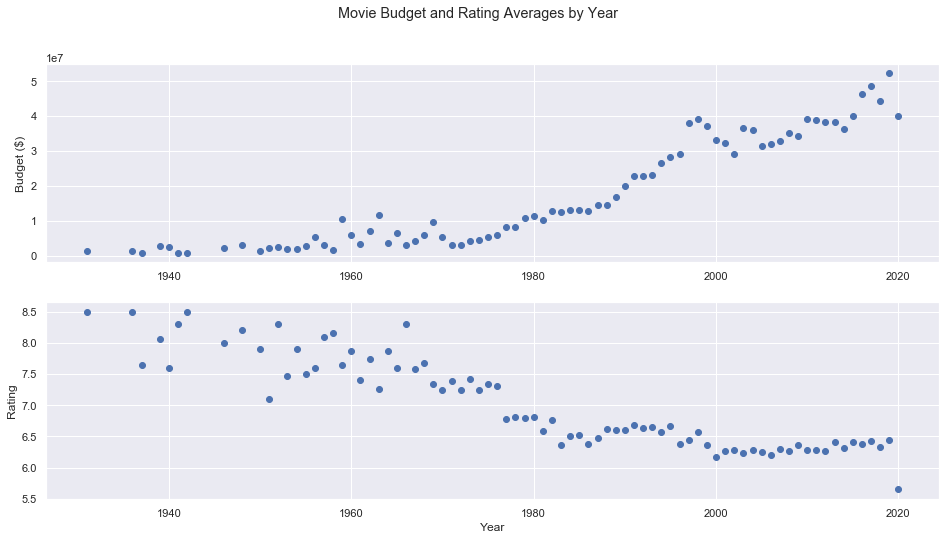

In [73]:
fig, axs = plt.subplots(2, figsize=(16,8))
axs[0].scatter(mean_budget_by_year.index, mean_budget_by_year['budget'])
axs[1].scatter(mean_rating_by_year.index, mean_rating_by_year['avg_vote'])

# set titles and labels
fig.suptitle('Movie Budget and Rating Averages by Year')
axs[0].set_ylabel('Budget ($)')
axs[1].set_ylabel('Rating')
axs[1].set_xlabel('Year')

### Movies over the years analysis

1) How many times more expensive is an average movie made in 2019 compared to an average movie from 1980?
    
  
    Movie budgets in 2019 were about 5x more expensive than they were in 1980. On the top graph, we can see in year 1980 the average budget was around 10,000,000. In 2019 the movie budgets were aroun d 50,000,000. 
  
2) Average scores appear to fall over time. One explanation is that nowadays average movies are simply worse than they used to be. Think of at least two other distinct reasons why this may be the case (reasons must be plausible though no justification is needed).

    There are multiple reasons there may be a rating drop over the years. For one, people getting used to movies. Movies in the old days were a technological wonder. People were amazed by the abilities of seeing a movie picture and basic editing developments and thus were an easier crowd to please. Today, we have much higher expectations for movie production and potentially the technology can not keep up with our expectations. 
    
    Second, more movies have come out over the years, potentially hurting the average score for all movies.. If you look below I have created an additional DataFrame that shows the number of movies that have come out over the years. With more options to compare a movie to a movie rater may develop higher standards and thus rate movies lower. 

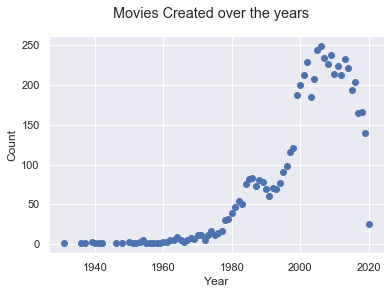

In [131]:
# count entries per year and graph
movies_per_year = df_movies.groupby('year').count()
plt.scatter(movies_per_year.index, movies_per_year['title'])
#set titles
plt.suptitle('Movies Created over the years')
plt.xlabel("Year")
plt.ylabel('Count');